# Welcome to AI Programming!

## What You Will Learn

In this notebook, you will embark on an exciting journey into the world of Artificial Intelligence (AI) programming. By the end of this tutorial, you will have:

1. **Learned the basics of Python programming** and how to set up your environment for AI development.
2. **Understood the concept of machine learning** and how models are trained to recognize patterns in data.
3. **Built and trained a neural network** using PyTorch, a powerful library for deep learning.
4. **Trained a model to recognize handwritten digits** from the famous MNIST dataset.
5. **Gained confidence in AI programming** by executing code step-by-step and understanding each operation.

Remember, learning is a journey, and every small step you take brings you closer to mastering AI. Let's get started!

## Step 1: Setting Up Your Environment

Before we dive into coding, we need to set up our environment. This involves installing the necessary tools and libraries.

### What is `pip`?

`pip` is a package manager for Python. It allows you to install and manage additional libraries and dependencies that are not included in the standard Python library.

### What is PyTorch?

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab. It provides a flexible platform for building and training neural networks.

### Installing Required Packages

We will use `pip` to install PyTorch and other necessary libraries. Run the following code cell to install them.

In [ ]:
!pip install torch torchvision matplotlib

### Explanation:

- `torch`: The main PyTorch library.
- `torchvision`: A library that provides datasets, model architectures, and image transformations for computer vision.
- `matplotlib`: A plotting library that we will use to visualize our data and results.

Once the installation is complete, we can start coding!

## Step 2: Importing Libraries

Now that we have installed the necessary packages, let's import them into our notebook. This will allow us to use their functions and classes in our code.

Run the following code cell to import the libraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

### Explanation:

- `torch`: The main PyTorch library.
- `torch.nn`: Contains classes for building neural networks.
- `torch.optim`: Contains optimization algorithms.
- `torchvision`: Provides access to datasets and model architectures.
- `torchvision.transforms`: Provides common image transformations.
- `matplotlib.pyplot`: A plotting library for visualizing data.
- `numpy`: A library for numerical computations in Python.

With these libraries imported, we are ready to start working with data.

## Step 3: Loading the MNIST Dataset

The MNIST dataset is a collection of 70,000 handwritten digits (0-9) that is commonly used for training and testing machine learning models. Each image is 28x28 pixels.

We will use `torchvision` to load the dataset. Run the following code cell to load the data.

In [2]:
# Define a transformation to convert images to tensors and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 10.4MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 772kB/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 6.43MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 866kB/s]


### Explanation:

- `transforms.Compose`: Combines multiple image transformations.
- `transforms.ToTensor()`: Converts images to PyTorch tensors.
- `transforms.Normalize`: Normalizes the tensor values to have a mean of 0.5 and a standard deviation of 0.5.
- `torchvision.datasets.MNIST`: Loads the MNIST dataset.
- `torch.utils.data.DataLoader`: Creates an iterable over the dataset, allowing us to load data in batches.

Now that we have loaded the data, let's visualize some of the images.

## Step 4: Visualizing the Data

Before training a model, it's important to understand the data we are working with. Let's visualize some of the images from the MNIST dataset.

Run the following code cell to display a few images.

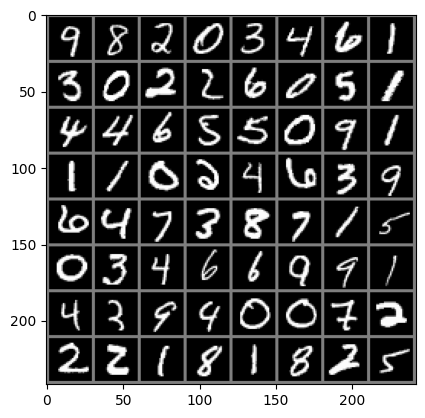

In [3]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

### Explanation:

- `imshow`: A helper function to unnormalize and display an image.
- `iter(trainloader)`: Creates an iterator over the training data.
- `next(dataiter)`: Gets the next batch of images and labels.
- `torchvision.utils.make_grid`: Creates a grid of images for display.

You should now see a grid of handwritten digits. This is the data our model will learn from!

## Step 5: Building the Neural Network

Now that we have our data ready, let's build a simple neural network to classify the digits. We will use PyTorch's `nn.Module` to define our model.

Run the following code cell to define the neural network.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the network
net = Net()

### Explanation:

- `nn.Module`: The base class for all neural network modules in PyTorch.
- `nn.Linear`: Applies a linear transformation to the incoming data.
- `torch.relu`: Applies the Rectified Linear Unit (ReLU) activation function.
- `x.view(-1, 28 * 28)`: Flattens the 28x28 image into a 1D vector of 784 elements.

Our network has three layers:

1. **Input Layer**: 784 neurons (one for each pixel in the image).
2. **Hidden Layer 1**: 128 neurons.
3. **Hidden Layer 2**: 64 neurons.
4. **Output Layer**: 10 neurons (one for each digit class).

Next, we will define a loss function and an optimizer to train the network.

## Step 6: Defining the Loss Function and Optimizer

To train our neural network, we need to define a loss function and an optimizer.

- **Loss Function**: Measures how well the model is performing. We will use Cross-Entropy Loss, which is commonly used for classification tasks.
- **Optimizer**: Updates the model's weights to minimize the loss. We will use Stochastic Gradient Descent (SGD).

Run the following code cell to define the loss function and optimizer.

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Explanation:

- `nn.CrossEntropyLoss`: Computes the cross-entropy loss between the predicted and actual labels.
- `optim.SGD`: Implements Stochastic Gradient Descent with momentum.
- `lr=0.001`: The learning rate controls how much the model's weights are updated during training.
- `momentum=0.9`: Helps accelerate gradients vectors in the right direction, leading to faster convergence.

Now that we have defined our loss function and optimizer, we are ready to train the model!

## Step 7: Training the Model

Training a neural network involves feeding the data through the network, calculating the loss, and updating the weights to minimize the loss. This process is repeated for multiple epochs.

Run the following code cell to train the model for 5 epochs.

In [6]:
for epoch in range(5):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 200 == 199:  # Print every 200 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Batch 200] loss: 2.121
[Epoch 1, Batch 400] loss: 1.368
[Epoch 1, Batch 600] loss: 0.773
[Epoch 1, Batch 800] loss: 0.534
[Epoch 2, Batch 200] loss: 0.422
[Epoch 2, Batch 400] loss: 0.390
[Epoch 2, Batch 600] loss: 0.380
[Epoch 2, Batch 800] loss: 0.367
[Epoch 3, Batch 200] loss: 0.341
[Epoch 3, Batch 400] loss: 0.329
[Epoch 3, Batch 600] loss: 0.325
[Epoch 3, Batch 800] loss: 0.322
[Epoch 4, Batch 200] loss: 0.287
[Epoch 4, Batch 400] loss: 0.305
[Epoch 4, Batch 600] loss: 0.292
[Epoch 4, Batch 800] loss: 0.289
[Epoch 5, Batch 200] loss: 0.270
[Epoch 5, Batch 400] loss: 0.283
[Epoch 5, Batch 600] loss: 0.270
[Epoch 5, Batch 800] loss: 0.253
Finished Training


### Explanation:

- `epoch`: One complete pass through the entire training dataset.
- `optimizer.zero_grad()`: Clears the gradients of all optimized variables.
- `outputs = net(inputs)`: Passes the input data through the network to get the predicted outputs.
- `loss = criterion(outputs, labels)`: Computes the loss between the predicted and actual labels.
- `loss.backward()`: Computes the gradients of the loss with respect to the model parameters.
- `optimizer.step()`: Updates the model parameters using the computed gradients.

After training, the model should have learned to recognize handwritten digits. Let's test it on the test dataset!

## Step 8: Testing the Model

Now that the model is trained, we can evaluate its performance on the test dataset. This will give us an idea of how well the model generalizes to unseen data.

Run the following code cell to test the model.

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

### Explanation:

- `torch.no_grad()`: Disables gradient calculation, which is not needed during testing.
- `torch.max(outputs.data, 1)`: Returns the maximum value and its index for each row in the output tensor. This gives us the predicted class.
- `(predicted == labels).sum().item()`: Counts the number of correct predictions.

The accuracy should be around 90-95%, depending on the training process. Congratulations! You have successfully trained a neural network to recognize handwritten digits.

## Step 9: Conclusion

You have completed your first AI programming project! By following this notebook, you have learned how to:

1. Set up your environment for AI development.
2. Load and preprocess data using PyTorch.
3. Build and train a neural network from scratch.
4. Evaluate the performance of your model.

This is just the beginning of your AI journey. Keep exploring, experimenting, and learning. The possibilities are endless!